In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

from scipy.interpolate import interp1d
import scipy.stats as ss
from astropy import units as u
from astropy.cosmology import WMAP5, WMAP7
from astropy.coordinates import Distance
import tqdm

In [2]:
d1 = Distance(10, u.Mpc)
d2 = Distance(40, unit=u.au)
d3 = Distance(value=5, unit=u.kpc)
d4 = Distance(z=0.23)
d5 = Distance(z=0.23, cosmology=WMAP5, unit=u.Mpc)
d6 = Distance(distmod=24.47)
d7 = Distance(Distance(10 * u.Mpc))
d8 = Distance(parallax=21.34*u.mas)

The COSMOS survey is centered at (J2000):

RA +150.11916667 (10:00:28.600)

DEC +2.20583333 (+02:12:21.00)

In [3]:
conv_ra = (150.11916667 - (10 + 0/60 + 28.6/3600))
conv_ra

140.11122222555557

In [4]:
file = open('COSMOS/cosmos2015.tsv','r')
k=0
for f in file.readlines():
    if "-------" in f:
        break
    else:
        k+=1

print(k)

164


In [5]:
tabla = pd.read_csv('COSMOS/cosmos2015.tsv',skiprows=k-2, sep=";")
tabla = tabla.iloc[2:,:]

for c in tabla.columns.values:
    tabla[c] = [p.replace(" ","") if type(p)==str else p for p in tabla[c].values]
    
tabla = tabla[tabla!=""]
tabla = tabla.astype(float)

tabla.head()

/Users/santi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,18,20,22,24,28,30,40,42,55,56,61,62,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RAJ2000,DEJ2000,Seq,Area,E(B-V),Sat,Cfl,Deep,Flag,Ksmag,...,OType,zPDF,b_zPDF,B_zPDF,Age,Mass,SFR,Lnuv,Lr,Lk
2,149.717061,1.620205,215930.0,0.0,0.023,5.0,1.0,0.0,0.0,15.3034,...,0.0,0.0900,0.0832,0.0968,8.000000e+09,10.83,-0.46,27.73,29.34,29.70
3,150.039769,1.615335,216340.0,0.0,0.019,4.0,1.0,0.0,0.0,16.0907,...,2.0,NaN,NaN,NaN,NaN,-99.00,-99.00,NaN,NaN,NaN
4,149.691556,1.630146,216437.0,0.0,0.022,5.0,1.0,0.0,0.0,18.7489,...,0.0,0.4722,0.4430,0.5102,8.000000e+09,10.95,0.92,29.08,29.79,29.94
5,149.694280,1.626015,216438.0,0.0,0.022,15.0,1.0,0.0,0.0,12.7199,...,0.0,NaN,NaN,NaN,NaN,-99.00,-99.00,NaN,NaN,NaN
6,149.697606,1.616639,216439.0,0.0,0.023,0.0,1.0,0.0,0.0,21.1359,...,0.0,0.0386,0.0201,0.0739,1.300000e+10,8.07,-99.00,23.73,26.27,26.72


In [6]:
tabla.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Area', 'E(B-V)', 'Sat', 'Cfl', 'Deep',
       'Flag', 'Ksmag', 'e_Ksmag', 'Ymag', 'e_Ymag', 'Hmag', 'e_Hmag', 'Jmag',
       'e_Jmag', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'ipmag', 'e_ipmag',
       'rmag', 'e_rmag', 'umag', 'e_umag', 'zpmag', 'e_zpmag', 'zppmag',
       'e_zppmag', '3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag', '5.8mag',
       'e_5.8mag', '8.0mag', 'e_8.0mag', 'Hwmag', 'e_Hwmag', 'Kswmag',
       'e_Kswmag', 'yHmag', 'e_yHmag', '24mag', 'e_24mag', 'ID24um', 'ID2006',
       'ID2008', 'ID2013', 'NUVmag', 'e_NUVmag', 'FUVmag', 'e_FUVmag', 'zphot',
       'OType', 'zPDF', 'b_zPDF', 'B_zPDF', 'Age', 'Mass', 'SFR', 'Lnuv', 'Lr',
       'Lk'],
      dtype='object')

In [8]:
#columns = ['RAJ2000','DEJ2000','Seq','Area','E(B-V)','Sat','Cfl','Deep','Flag','Ksmag','e_Ksmag','Ymag','e_Ymag','Hmag','e_Hmag','Jmag','e_Jmag','Bmag','e_Bmag','Vmag','e_Vmag','ipmag','e_ipmag','rmag','e_rmag','umag','e_umag','zpmag','e_zpmag','zppmag','e_zppmag','3.6mag','e_3.6mag','4.5mag','e_4.5mag','5.8mag','e_5.8mag','8.0mag','e_8.0mag','Hwmag','e_Hwmag','Kswmag','e_Kswmag','yHmag','e_yHmag','24mag','e_24mag','ID24um','F160um','e_F160um','ID2006','ID2008','ID2013','NUVmag','e_NUVmag','FUVmag','e_FUVmag','zphot','OType','zPDF','b_zPDF','B_zPDF','zChi2','zphot2','zQ','Age','MassMed','b_MassMed','B_MassMed','Mass','SFRMed','b_SFRMed','B_SFRMed','SFR','Lnuv','Lr','Lk']
#tabla = pd.read_csv('COSMOS/asu.tsv',skiprows=k+1, sep=";", names=columns)
tabla.head()

,RAJ2000,DEJ2000,Seq,Area,E(B-V),Sat,Cfl,Deep,Flag,Ksmag,...,OType,zPDF,b_zPDF,B_zPDF,Age,Mass,SFR,Lnuv,Lr,Lk
2,149.717061,1.620205,215930.0,0.0,0.023,5.0,1.0,0.0,0.0,15.3034,...,0.0,0.0900,0.0832,0.0968,8.000000e+09,10.83,-0.46,27.73,29.34,29.70
3,150.039769,1.615335,216340.0,0.0,0.019,4.0,1.0,0.0,0.0,16.0907,...,2.0,NaN,NaN,NaN,NaN,-99.00,-99.00,NaN,NaN,NaN
4,149.691556,1.630146,216437.0,0.0,0.022,5.0,1.0,0.0,0.0,18.7489,...,0.0,0.4722,0.4430,0.5102,8.000000e+09,10.95,0.92,29.08,29.79,29.94
5,149.694280,1.626015,216438.0,0.0,0.022,15.0,1.0,0.0,0.0,12.7199,...,0.0,NaN,NaN,NaN,NaN,-99.00,-99.00,NaN,NaN,NaN
6,149.697606,1.616639,216439.0,0.0,0.023,0.0,1.0,0.0,0.0,21.1359,...,0.0,0.0386,0.0201,0.0739,1.300000e+10,8.07,-99.00,23.73,26.27,26.72


Nos quedamos solo con las galaxias detetadas en el estudio

In [7]:
print("El %.2f por ciento de la muestra son galaxias." % ((tabla.OType == 0).sum()/tabla.shape[0]*100))
tabla = tabla[tabla.OType == 0]

El 95.74 por ciento de la muestra son galaxias.


In [8]:
tabla.shape[0]

581010

In [9]:
((tabla.Cfl.values == 1) & (tabla.Deep.values == 0)).sum() / tabla.shape[0]

0.6121856766664946

In [10]:
posiciones = np.char.add(tabla.RAJ2000.values.astype(str),np.char.add('-',tabla.DEJ2000.values.astype(str)))

np.unique(posiciones).shape[0]/posiciones.shape[0]


1.0

In [11]:
data_wang = np.array([
['COS-16199','10:00:25.41','+02:25:43.9','21.96','3.91','0.09','6.54','+1.43','1.54','10.90','+0.14','0.27'],
['COS-19762','10:00:15.89','+02:24:45.9','22.94','4.35','0.10','3.52','+5.36','0:19','10.79','+0.88','0:08'],
['COS-23718','10:00:28.95','+02:25:05.3','22.82','2.25','0.10','5.77','+0:80','0:88','11.02','+0.13','0:24'],
['COS-23913','10:00:23.03','+02:21:55.0','22.87','1.63','0.09 ','3.65','+0:35','0:29','10.6','+0.10','0:11'],
['COS-24466','10:00:38.07','+02:28:06.2','23.22','1.38','0.09','3.35','+0:39','0:38','10.37','+0.34','0:26'],
['COS-25270','10:00:23.62','+02:13:57.4','23.47','<0.6','3.78','+0:55','0:56','10.48','+0:04','0.20'],
['COS-25363','10:00:26.68','+02:31:26.2','23.15','3.0','0.2','5.113','+0:001','0:005','10.52','+0.09','0:19'],
['COS-25881','10:00:27.03','+02:24:24.0','22.96','1.30','0.10','6.58','+1:43','1:38','11.12','+0.17','0:30'],
['COS-27285','10:00:27.79','+02:25:52.2','23.74','1.58','0.09','4.32','+0:23','0:22','10.31','+0.14','0:06'],
['COS-27392','10:00:27.98','+02:25:29.7','23.42','<0.6','3.61','+0:51','0:49','10.38','+0:11','0:08'],
['COS-30182','10:00:14.70','+02:28:01.7','23.08','1.59','0.09','6.37','+1:16','2:15','10.94','+0:22','0:28'],
['COS-30614','10:00:14.69','+02:30:04.6','23.39','0.85','0.10','3.97','+0:19','0:29','10.22','+0:04','0:14'],
['COS-31278','10:00:26.09','+02:12:31.6','23.36','0.93','0.09','3.37','+0:43','0:35','10.14','+0:13','0:15'],
['COS-31483','10:00:46.50','+02:23:09.1','23.89','0.70','0.11','2.97','+0:40','0:41','9.91','+0:13','0:13'],
['COS-31661','10:00:41.83','+02:25:47.0','23.28','2.88','0.12','3.72','+0:17','0:19','10.36','+0:05','0:20'],
['COS-32409','10:00:15.84','+02:23:04.0','23.66','0.70','0.11','3.91','+1:66','1:16','9.87','+0:48','0:06'],
['COS-32932','10:00:22.44','+02:23:41.1','23.22','<0.6','3.0971','+0:0002','0:001','9.96','+0:15','0:11'],
['COS-34487','10:00:35.34','+02:28:26.7','23.36','4.3','0.15','3.15','+0:52','0:60','10.18','+0:26','0:20'],
['GDS-25526','03:32:47.97','-27:54:16.4','22.05','8.34','0.18','4.74','+0:28','0:30','10.84','+0:05','0:17'],
['GDS-27571','03:32:30.62','-27:42:24.3','22.44','0.82','0.16','4.64','+0:19','1:64','10.89','+0:04','0:48'],
['GDS-40613','03:32:11.44','-27:52:07.1','23.17','1.83','0.18','3.04','+0:22','0:35','10.64','+0:02','0:22'],
['GDS-43215','03:32:20.34','-27:42:28.8','23.02','1.52','0.16','2.91','+0:19','0:22','10.25','+0:03','0:53'],
['GDS-44539','03:32:28.59','-27:48:50.2','23.41','0.69','0.10','4.22','+0:77','0:67','10.94','+0:03','0:31'],
['GDS-47375','03:32:14.62','-27:43:06.0','23.48','1.89','0.12','3.60','+0:66','0:66','10.27','+0:13','0:12'],
['GDS-48764','03:32:32.31','-27:54:26.9','23.31','2.54','0.42','5.16','+3:08','1:73','10.38','+0:51','0:03'],
['GDS-48885','03:32:47.17','-27:45:25.1','23.57','0.87','0.11','4.62','+0:19','0:17','10.56','+0:02','0:08'],
['GDS-49094','03:32:31.85','-27:43:12.7','23.59','0.89','0.13','3.69','+0:29','0:28','10.29','+0:10','0:05'],
['GDS-52734','03:32:10.10','-27:50:33.1','24.06','1.41','0.15','5.13','+1:72','1:18','10.71','+0:17','0:21'],
['GDS-54513','03:32:04.99','-27:41:56.5','23.71','<0.6','4.33','+0:32','0:37','10.30','+0:00','0:37'],
['GDS-58560','03:32:40.11','-27:42:55.3','23.85','<0.6','5.35','+2:33','2:18','10.58','+0:39','0:43'],
['UDS-24945','02:16:59.77','-05:11:52.8','22.16','<0.6','3.50','+0:76','0:61','10.76','+0:22','0:11'],
['UDS-29006','02:17:05.52','-05:08:45.8','22.71','<0.6','3.79','+0:54','0:53','10.46','+0:12','0:21'],
['UDS-31037','02:18:07.67','-05:13:26.8','22.58','1.83','0.13','3.62','+0:70','0:65','10.49','+0:26','0:07'],
['UDS-31072','02:17:43.32','-05:11:57.4','22.29','3.63','0.25','4.20','+4:17','0:44','11.31','+0:33','0:09'],
['UDS-31959','02:18:11.36','-05:16:23.7','22.98','<0.6','3.88','+0:68','0:73','10.22','+0:19','0:14'],
['UDS-34637','02:18:05.80','-05:11:23.1','22.89','1.07','0.37','2.84','+0:54','0:44','10.33','+0:16','0:17'],
['UDS-37344','02:18:02.86','-05:15:05.4','23.36','<0.6','2.89','+1:43','1:48','10.18','+0:08','0:63'],
['UDS-37423','02:18:10.02','-05:11:31.5','23.07','1.12','0.15','7.47','+0:63','0:64','11.17','+0:20','0:08'],
['UDS-37560','02:17:03.44','-05:15:51.3','22.72','4.40','0.14','3.95','+0:35','0:34','10.35','+0:22','0:17'],
['UDS-37649','02:17:36.95','-05:16:07.3','23.14','1.25','0.31','2.82','+0:44','0:48','10.31','+0:11','0:07'],
['UDS-40772','02:17:36.56','-05:12:52.0','23.19','1.96','0.31','4.00','+0:98','0:98','10.87','+0:00','0:40'],
['UDS-41502','02:17:18.03','-05:11:03.9','23.23','1.59','0.20','3.73','+0:44','0:43','10.59','+0:09','0:33'],
['UDS-41525','02:16:59.59','-05:14:15.4','23.34','<0.6','6.13','+1:08','1:01','11.17','+0:15','0:16'],
['UDS-41773','02:18:07.02','-05:09:18.1','23.11','1.54','0.15','3.52','+1:35','0:84','10.20','+0:56','0:24'],
['UDS-42280','02:18:11.16','-05:10:27.1','23.88','1.16','0.37','4.21','+0:18','0:17','10.06','+0:09','0:16'],
['UDS-42875','02:18:21.15','-05:09:42.5','23.04','1.74','0.15','7.20','+1:20','1:83','11.75','+0:05','0:34'],
['UDS-43941','02:17:43.65','-05:14:23.9','23.46','1.91','0.11','3.39','+0:23','0:23','10.17','+0:02','0:10'],
['UDS-44515','02:18:20.89','-05:11:11.1','23.48','<0.6','4.20','+1:35','1:35','10.59','+0:07','0:27'],
['UDS-44594','02:17:20.20','-05:11:55.4','23.79','0.66','0.14','4.44','+0:52','0:39','10.60','+0:04','0:17'],
['UDS-45868','02:18:15.00','-05:10:02.7','23.61','<0.6','3.66','+0:88','0:88','10.45','+0:13','0:13'],
['UDS-46241','02:17:58.31','-05:15:00.3','23.44','<0.6','2.18','+0:78','0:53','9.72','+0:22','0:38'],
['UDS-46513','02:18:17.87','-05:11:53.9','23.84','0.58','0.11','3.54','+0:95','0:93','10.31','+0:11','0:19'],
['UDS-46648','02:17:08.17','-05:15:37.8','23.52','2.27','0.20','6.88','+1:67','1:74','11.37','+0:30','0:43'],
['UDS-46693','02:17:59.07','-05:09:37.5','23.47','<0.6','3.56','+0:37','0:26','10.24','+0:05','0:29'],
['UDS-48514','02:17:29.83','-05:14:23.5','23.65','<0.6','2.59','+0:93','0:83','10.04','+0:03','0:42'],
['UDS-49119','02:17:07.14','-05:12:54.0','23.77','1.34','0.30','4.60','+1:94','1:83','10.65','+0:01','0:53'],
['UDS-49199','02:18:21.40','-05:11:46.3','23.6','<0.6','3.96','+0:84','0:97','10.66','+0:04','0:24'],
['UDS-49594','02:18:01.13','-05:13:45.7','23.65','<0.6','3.77','+0:48','0:55','9.79','+0:03','0:26'],
['UDS-49784','02:17:37.48','-05:09:47.7','23.6','<0.6','3.95','+1:63','2:21','9.91','+0:41','0:77'],
['UDS-51119','02:17:58.29','-05:11:44.7','23.75','<0.6','3.45','+1:16','1:16','10.25','+0:12','0:13'],
['UDS-52324','02:17:06.27','-05:09:48.3','23.49','2.69','0.16','4.95','+1:74','1:61','10.62','+0:12','0:26'],
['UDS-54074','02:17:09.70','-05:15:11.3','23.75','0.81','0.10','5.89','+1:90','2:37','10.65','+0:17','0:35'],
['UDS-63094','02:17:53.06','-05:11:25.5','23.98','<0.6','5.08','+0:24','0:26','10.00','+0:08','0:27']
])

columns_wang = ['RAJ2000','DEJ2000','4.5mag','S870','e_S870', 'z','B_z','b_z','Mass','B_Mass','b_Mass']

wang = pd.DataFrame(columns=columns_wang)
index = []
j = 0
for a in data_wang:
    for i in range(len(columns_wang)):
        if '<' in a[i]:
            a.insert(i+1,'0')
            a[i] = '0'
        a[i] = float(a[i].replace(":",".")) if i >2 else a[i]
        
        if i in [1,2]:
            k = a[i].find(":")
            p = a[i][k+1:].find(":") + k+1
            h = float(a[i][0:k])
            m = float(a[i][k+1:p])
            s = float(a[i][k+p+1:])
            a[i] = h + m/60 + s/3600
            a[i] = a[i] + conv_ra if i==1 else a[i]
            
    
    wang.loc[j] = a[1:]
    index.append(a[0])
    j += 1

wang.index = index
wang.index.name = 'ID'
wang.iloc[:18]

,RAJ2000,DEJ2000,4.5mag,S870,e_S870,z,B_z,b_z,Mass,B_Mass,b_Mass
ID,,,,,,,,,,,
COS-16199,150.111336,2.419167,21.96,3.91,0.09,6.5400,1.4300,1.540,10.90,0.14,0.27
COS-19762,150.111469,2.402500,22.94,4.35,0.10,3.5200,5.3600,0.190,10.79,0.88,0:08
COS-23718,150.111486,2.417500,22.82,2.25,0.10,5.7700,0.8000,0.880,11.02,0.13,0:24
COS-23913,150.111231,2.350000,22.87,1.63,0.09,3.6500,0.3500,0.290,10.60,0.10,0:11
COS-24466,150.111242,2.467222,23.22,1.38,0.09,3.3500,0.3900,0.380,10.37,0.34,0:26
COS-25270,150.111394,2.217778,23.47,0.00,0.00,3.7800,0.5500,0.560,10.48,0.04,0.20
COS-25363,150.111411,2.517222,23.15,3.00,0.20,5.1130,0.0010,0.005,10.52,0.09,0:19
COS-25881,150.111231,2.400000,22.96,1.30,0.10,6.5800,1.4300,1.380,11.12,0.17,0:30
COS-27285,150.111442,2.417222,23.74,1.58,0.09,4.3200,0.2300,0.220,10.31,0.14,0:06


In [12]:
err = 0.0001
rep = []
w_i = 0
tab_index = np.arange(0,tabla.shape[0])
wang_index = np.arange(0,wang.shape[0])

for w in wang.iloc[:18,0:2].values:
    res = np.abs(tabla.loc[:,['RAJ2000','DEJ2000']].values - w).sum(axis=1)
    mask = res < err
    if mask.sum()>0:
        rep.append([w_i]+list(tab_index[mask]))
    w_i += 1
    
if rep == []:
    print('No existen galaxias repetidas entre muestras')
else:
    print('Existen %i galaxias repetidas:' % (len(rep)))
    for r in rep:
        print(r) 

No existen galaxias repetidas entre muestras


### Stelar Mass Function

Pata aplicar los diferentes metodos que se encuentran Weigel et al. 2016 necesitaos calcular la masa estelar límite para la cual podamos observar dicha galaxia, para ello se sigue el método explicado en Weigel et al. 2016 que se remonta al trabajo de Pozzeti et al. 2010.

<img src="images/weigle_1.png">

In [13]:
columns_laigle = ['RAJ2000', 'DEJ2000','Cfl', 'Deep',
       'Flag', 'Ksmag', 'e_Ksmag','3.6mag', 'e_3.6mag', '4.5mag', 'e_4.5mag','rmag', 'e_rmag', 'umag', 'e_umag', 'zphot',
       'Mass']
laigle = tabla.loc[:,columns_laigle]
laigle = laigle[laigle.zphot >0]
laigle = laigle[laigle.Cfl == 1]
laigle = laigle[laigle.Deep == 1]
laigle = laigle[~(np.isnan(laigle.values).sum(axis=1).astype(bool))]

Red Level:
$$ u-r=0.6+0.15 \times \log M $$
Blue Level:
$$ u-r=0.15+0.15 \times \log M $$

In [14]:
red_level = 0.6 + 0.15*laigle.Mass
blue_level = 0.15 + 0.15*laigle.Mass
laigle['u-r'] = laigle.umag - laigle.rmag

red_galaxies = (laigle['u-r'].values > red_level).sum()/laigle.shape[0]
blue_galaxies = (laigle['u-r'].values < blue_level).sum()/laigle.shape[0]
green_galaxies = 1 - red_galaxies - blue_galaxies

print("De un total de %i galaxias en Laigle el %.2f p.c. son rojas, %.2f p.c son verdes y el %.2f p.c son azules"%(laigle.shape[0],red_galaxies*100,green_galaxies*100,blue_galaxies*100))

#Clasificacion según Schawinski et al. 2014
# 1->RED ; 2->BLUE ; 3->GREEN
laigle['MType'] = (laigle['u-r'].values > red_level).astype(int) + (laigle['u-r'].values < blue_level).astype(int)*2 + ((laigle['u-r'].values >= blue_level)&(laigle['u-r'].values <= red_level))*3


De un total de 151366 galaxias en Laigle el 11.15 p.c. son rojas, 8.45 p.c son verdes y el 80.41 p.c son azules


In [15]:
mag_lim = np.quantile(laigle['4.5mag'].values[:18],0.75) 
#Definimos los límites de magnitud por el primer y tercer cuartil
#Dicha definición se aproxima a la tomada por Davidzon et al. 2017 en 3.6 mag
M_lim = laigle.Mass + 0.4 * (laigle['4.5mag'] - mag_lim)
laigle['Mass_lim'] = M_lim
laigle

,RAJ2000,DEJ2000,Cfl,Deep,Flag,Ksmag,e_Ksmag,3.6mag,e_3.6mag,4.5mag,e_4.5mag,rmag,e_rmag,umag,e_umag,zphot,Mass,u-r,MType,Mass_lim
35178,149.845494,1.702377,1.0,1.0,0.0,26.5089,0.5060,25.8088,0.2702,25.4473,0.1604,26.9870,0.2549,26.8803,0.169500,1.877,8.12,-0.1067,2,8.31875
35420,149.850868,1.702547,1.0,1.0,0.0,23.3680,0.0386,23.6289,0.0619,23.3462,0.0573,24.6033,0.0440,25.1487,0.045080,2.345,9.38,0.5454,2,8.73831
35430,149.843901,1.703065,1.0,1.0,0.0,24.3048,0.0663,23.9016,0.0582,23.4296,0.0315,26.6987,0.1734,28.9334,1.115000,2.292,9.48,2.2347,1,8.87167
35541,149.843817,1.702494,1.0,1.0,0.0,22.7931,0.0242,22.9595,0.0370,23.0105,0.0479,24.1339,0.0325,25.3778,0.061670,2.497,9.77,1.2439,2,8.99403
35633,149.846297,1.703509,1.0,1.0,0.0,25.8938,0.2864,27.6758,1.1035,27.2681,1.0697,26.4873,0.1666,27.6146,0.329300,0.357,6.56,1.1273,2,7.48707
35660,149.815346,1.703344,1.0,1.0,0.0,23.5590,0.0568,23.4234,0.0425,23.4422,0.0852,24.8141,0.0528,26.2158,0.158900,2.691,9.74,1.4017,2,9.13671
35666,149.846607,1.703320,1.0,1.0,0.0,24.0937,0.0711,24.2425,0.0610,24.3060,0.0887,25.6347,0.1016,26.7573,0.193600,1.091,8.48,1.1226,2,8.22223
35677,149.843660,1.703382,1.0,1.0,0.0,24.1372,0.0609,24.0677,0.0832,24.4402,0.1229,25.9575,0.0994,27.4147,0.296700,2.267,9.26,1.4572,2,9.05591
35678,149.840075,1.703158,1.0,1.0,0.0,24.4133,0.1201,23.9634,0.0449,24.3794,0.1176,25.1407,0.0652,25.6644,0.092540,2.332,9.45,0.5237,2,9.22159
35702,150.202094,1.703625,1.0,1.0,0.0,27.4090,1.1362,25.9068,0.1958,25.3766,0.1848,26.4236,0.1345,26.8938,0.119400,0.625,7.52,0.4702,2,7.69047


In [16]:
def f(x,y,Xi,Yi):
    z = np.zeros((Xi.shape[0],Yi.shape[0]))
    for i in tqdm.trange(1,Xi.shape[0]):
        x_0 = Xi[i-1]
        x_1 = Xi[i]
        y_1 = Yi[0]
        mask_x = (x > x_0) & (x <= x_1)
        mask_y = (y <= y_1)
        z[0,i] = (mask_x & mask_y).sum()
        
        for j in range(1,Xi.shape[0]):
            x_0 = Xi[i-1]
            y_0 = Yi[j-1]
            x_1 = Xi[i]
            y_1 = Yi[j]
            mask_x = (x > x_0) & (x <= x_1)
            mask_y = (y > y_0) & (y <= y_1)
            z[j,i] = (mask_x & mask_y).sum()
            if i == 1:
                y_0 = Yi[j-1]
                x_1 = Xi[0]
                y_1 = Yi[j]
                mask_x = (x <= x_1)
                mask_y = (y > y_0) & (y <= y_1)
                z[j,0] = (mask_x & mask_y).sum()
        
    return z

x = laigle['Mass'].values
y = laigle['u-r'].values
ngridx = 200
ngridy = 200

xi = np.linspace(x.min(), x.max(), ngridx)
yi = np.linspace(y.min(), y.max(), ngridy)

#Xi, Yi = np.meshgrid(xi, yi)
z = f(x,y,xi,yi)
mask_x = (z > 0).sum(axis=1).astype(bool)
mask_y = (z > 0).sum(axis=0).astype(bool)
zi=(z[:,mask_x])[mask_y,:]/laigle.shape[0]*100
pxi = xi[mask_x]
pyi = yi[mask_y]
rli = 0.6 + 0.15*pxi
bli = 0.15 + 0.15*pxi

100%|██████████| 199/199 [00:20<00:00,  9.59it/s]


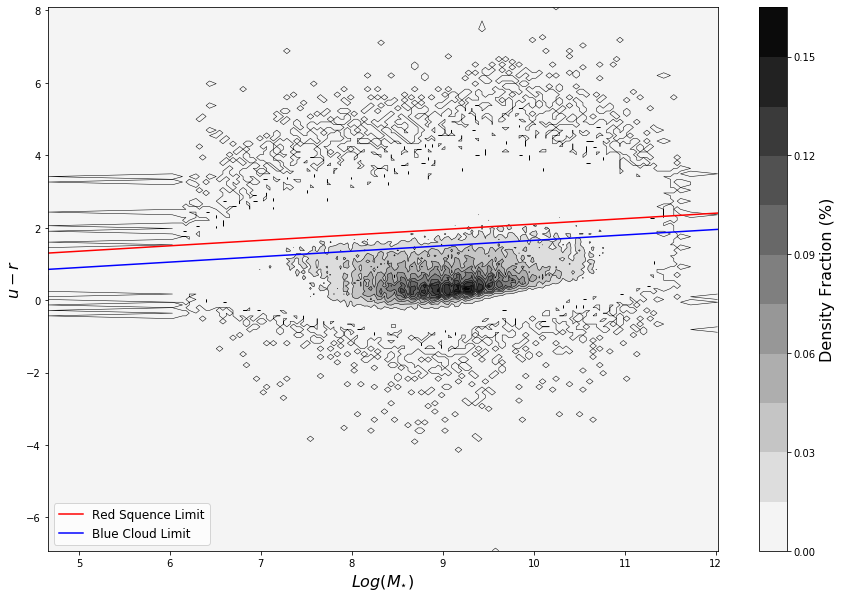

In [17]:
fig, ax1 = plt.subplots(figsize=(15,10))
#plt.plot(x, y, 'ko', ms=1)
ax1.contour(pxi, pyi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(pxi, pyi, zi, levels=14, cmap="binary")


ax1.plot(pxi,rli,'r-', label="Red Squence Limit")
ax1.plot(pxi,bli,'b-', label="Blue Cloud Limit")

cbar = fig.colorbar(cntr1, ax=ax1)
cbar.ax.set_ylabel('Density Fraction (%)', fontsize=16)
ax1.set_xlabel("$Log(M_{\star})$", fontsize=16)
ax1.set_ylabel("$u-r$", fontsize=16)
ax1.legend(fontsize=12,loc=3)
#plt.plot(x, y, 'ko', ms=3)

plt.show()

In [19]:

mask_z = (tabla.zphot >=2.5) & (tabla.zphot<=6)

NUV_r = tabla.NUVmag[mask_z] - tabla.rmag[mask_z]
r_J = tabla.rmag[mask_z] - tabla.Jmag[mask_z]

mask_nuvr = np.isnan(NUV_r.values)
mask_rj = np.isnan(r_J.values)



y = NUV_r[~(mask_nuvr | mask_rj)]
x = r_J[~(mask_nuvr | mask_rj)]

ngridx = 200
ngridy = 200

xi = np.linspace(x.min(), x.max(), ngridx)
yi = np.linspace(y.min(), y.max(), ngridy)

#Xi, Yi = np.meshgrid(xi, yi)
zi = f(x,y,xi,yi)

100%|██████████| 199/199 [01:29<00:00,  2.23it/s]


No handles with labels found to put in legend.


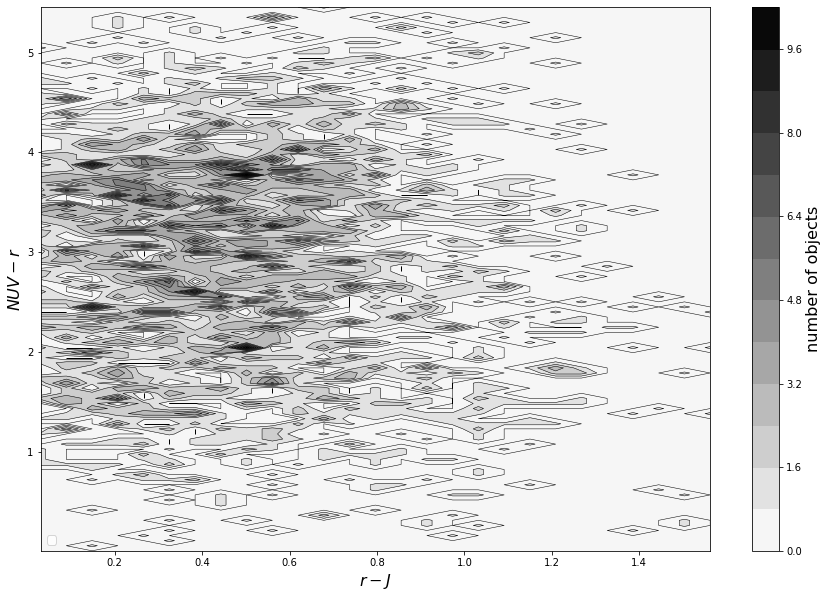

In [22]:
fig, ax1 = plt.subplots(figsize=(15,10))
mask_x = (xi >=0) & (xi<=1.6)
mask_y = (yi>=0) & (yi<=5.5)
pxi = xi[mask_x]
pyi = yi[mask_y]

pzi = zi[:,mask_x][mask_y,:]
lv = 14
ax1.contour(pxi, pyi, pzi, levels=lv, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(pxi, pyi, pzi, levels=lv, cmap="binary")

cbar = fig.colorbar(cntr1, ax=ax1)
cbar.ax.set_ylabel('number of objects', fontsize=16)
ax1.set_xlabel("$r-J$", fontsize=16)
ax1.set_ylabel("$NUV-r$", fontsize=16)
ax1.legend(fontsize=12,loc=3)
#plt.plot(x, y, 'ko', ms=3)

plt.show()

#### The $1/V_{max}$ technique

$$\Phi_{j} \mathrm{d} \log M=\sum_{i}^{N_{\mathrm{bin}}} \frac{w_{\mathrm{spec}, i}}{V_{\max , i}}$$
$$ V_{\max , i}=\frac{4 \pi}{3} \frac{\Omega^{s}}{\Omega^{\mathrm{sky}}}\left(d_{c}\left(z_{\max , i}\right)^{3}-d_{c}\left(z_{\min , i}\right)^{3}\right)$$

Donde $\Omega^{sky}$ = 41 253 deg$^2$ es el área del cielo total, $\Omega^s$ es el área del estudio, $d_c$ la distancia de comovimiento de los redshift seleccionado y $\omega_{spec,i}$ *is the spectroscopic completeness of source i which we extract from the catalogue by Yang et al. (2007).*

In [ ]:
columns_1 = ['RAJ2000','DEJ2000','Seq','Area','E(B-V)','Sat','Cfl','Deep','zphot','Age','MassMed','b_MassMed','B_MassMed','Mass','SFRMed','b_SFRMed','B_SFRMed','SFR','Lnuv','Lr','Lk']
tabla1 = tabla.loc[:,columns_1]

for c in columns_1:
    tabla1[c] = [p.replace(" ","") if type(p)==str else p for p in tabla1[c].values]
    
tabla1 = tabla1[tabla1!=""]
tabla1 = tabla1.astype(float)

In [ ]:
tabla1 = tabla1[tabla1.zphot >= 0]

In [ ]:
tabla_test = tabla1.loc[:,['Seq','zphot','Mass']]
tabla_test = tabla_test[~np.isnan(tabla_test)]
tabla_test = tabla_test[tabla_test.Mass > 6.8]

In [ ]:
bins_z = np.arange(4,11,1)
bins_mass = np.arange(6.9,12.5,0.2)

In [ ]:
mass_dic = {}

for z in bins_z:
    tab = tabla_test[(tabla_test.zphot.values >=z-0.5) & (tabla_test.zphot.values <z+0.5)]
    mass =np.array([((tab.Mass.values >=p - 0.2) & (tab.Mass.values < p+0.2)).sum() for p in bins_mass])
    v = volume(z-0.5,z+0.5,np.sqrt(2*np.pi/180))
    mass_dic[z] = mass / v

In [ ]:
mass_dic[4]

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Stellar Mass Function")
list_fmt = ['o','p','s','8','d','h','^']
l_colors = ['y','k','b','r','g','purple','orange']
i=0
for z in bins_z[0:5]:
    plt.plot(bins_mass,mass_dic[z],list_fmt[i],label="SMF z=%i"%(z),color=l_colors[i])
    i+=1

plt.yscale('log')
plt.xlabel("$Log(M_\star/M_\odot)$", fontsize=16)
plt.ylabel("$dn$ Mpc$^{-3}$ dex$^{-1}$", fontsize=16)
plt.legend(fontsize=14)

In [ ]:
mass_dic[7]

In [ ]:
def volume(z0,z1,l):
    d0 = Distance(z=z0,cosmology=WMAP7, unit=u.Mpc)
    d1 = Distance(z=z1,cosmology=WMAP7, unit=u.Mpc)
    w = l**2
    return w*(d1**3 - d0**3)/3

In [ ]:
volume(0,1,np.sqrt(2*np.pi/180))

In [ ]:
h_wmap7 = 0.704

In [ ]:
d_z1 = WMAP7.comoving_distance(1)
d1 = Distance(z=1,cosmology=WMAP7, unit=u.Mpc)
d1/2 == d_z1

In [ ]:
l = np.sqrt(np.pi/180)
(d1*2*l)**2/4 * h_wmap7**2

In [ ]:
d_z1

In [ ]:
d1

In [ ]:
WMAP7.comoving_volume(1)

## Trabajo de COSMOS2015( Laigle+, 2016)

In [135]:
#columns_laigle = ['RAJ2000','DEJ2000','Seq','Area','Ksmag','e_Ksmag','ipmag','e_ipmag','zphot','OType','zPDF','b_zPDF','B_zPDF','zChi2','zphot2','zQ','Age','MassMed','b_MassMed','B_MassMed','Mass','SFRMed','b_SFRMed','B_SFRMed','SFR','Lnuv','Lr','Lk']
columns_laigle = ['RAJ2000','DEJ2000','Ksmag','e_Ksmag','ipmag','e_ipmag','zPDF','b_zPDF','B_zPDF']
laigle = tabla.loc[:,columns_laigle]
for c in columns_laigle:
    laigle[c] = [p.replace(" ","") if type(p)==str else p for p in laigle[c].values]
    
laigle = laigle[laigle!=""]
laigle = laigle.astype(float)


/Users/santi/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Limpiamos los valores de los NAN

In [136]:
mask_Ks = np.isnan(laigle.Ksmag.values) & np.isnan(laigle.e_Ksmag.values)
mask_ip = np.isnan(laigle.ipmag.values) & np.isnan(laigle.e_ipmag.values)
mask_z = np.isnan(laigle.zPDF.values) & np.isnan(laigle.b_zPDF.values) & np.isnan(laigle.B_zPDF.values)
mask = mask_Ks | mask_ip | mask_z
print("La muestra descartada es de %i de un total de %i"%(mask.sum(), laigle.shape[0]))
laigle = laigle[~mask]

La muestra descartada es de 60610 de un total de 606887


Existe outlayers muy grandes en los error pero que quedan muy alejados del cuantile del 95 % cómo podemos ver, descartamos estos puntos de las muestras.

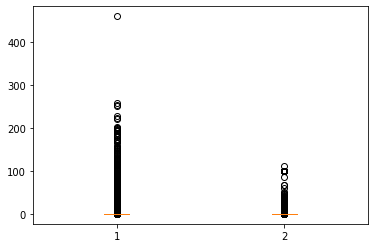

In [137]:
laigle.zPDF.values
bb = plt.boxplot([laigle.e_Ksmag.values,laigle.e_ipmag.values])

In [138]:
print("El 95 por ciento de los datos de los errores de Ks e i+ están por debajo, respectivamente, de %f y %f " % (np.quantile(laigle.e_Ksmag,0.5) , np.quantile(laigle.e_ipmag,0.5)))
mask_Ks = laigle.e_Ksmag.values < np.quantile(laigle.e_Ksmag,0.95)
mask_ip = laigle.e_ipmag.values < np.quantile(laigle.e_ipmag,0.95)
mask = mask_Ks & mask_ip 
print("La muestra descartada es de %i de un total de %i"%(mask.shape[0] - mask.sum(), laigle.shape[0]))
laigle = laigle[mask]

El 95 por ciento de los datos de los errores de Ks e i+ están por debajo, respectivamente, de 0.119200 y 0.086100 
La muestra descartada es de 50675 de un total de 495602


Definimos los bins de magnitud que vamos a calcular para compara los datos con los de Laigle 2016

In [140]:
mag_bins = np.arange(22,25.5,0.5)


ount = np.zeros(mag_bins.shape[0])
b_count = np.zeros(mag_bins.shape[0])
B_count = np.zeros(mag_bins.shape[0])

In [143]:
laigle.Ksmag.max()

28.439